In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [2]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is ACC0-1167

 Directory of C:\Users\shand\Documents\Siddy\ExcelR\Assignment\Clustering

13-01-2022  03:22    <DIR>          .
13-02-2022  20:53    <DIR>          ..
13-01-2022  02:33    <DIR>          .ipynb_checkpoints
13-01-2022  03:22           222,522 Clustering.ipynb
10-01-2022  23:09             1,328 crime_data.csv
10-01-2022  23:09           268,963 EastWestAirlines.xlsx
10-01-2022  23:09             1,560 Problem_Statement(Airlines).txt
10-01-2022  23:09               389 ProblemSatement(crime_data).txt
               5 File(s)        494,762 bytes
               3 Dir(s)  205,456,547,840 bytes free


## Airlines

In [3]:
Airlines = pd.read_excel('EastWestAirlines.xlsx', 'data')

In [4]:
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
Airlines.shape

(3999, 12)

In [6]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
#Normalization
def normalize(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [8]:
Air_norm = normalize(Airlines.iloc[:,1:])
Air_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


### Optimal Number of Clusters

#### Inertia


In [9]:
nc = [1,2,3,4,5,6,7,8,9]
iner = []
for i in nc:
    km = KMeans(i)
    y = km.fit(Air_norm.iloc[:,:11])
    iner.append(km.inertia_)
    

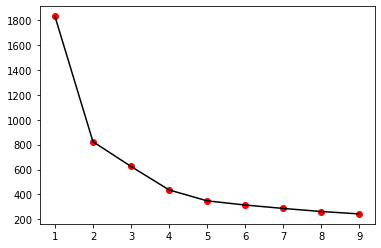

In [10]:
plt.plot(nc, iner, color = 'black')
plt.scatter(nc, iner, color = 'red')
plt.show()

#### Silhoutte Score

In [11]:
from sklearn.metrics import silhouette_score as sil

In [12]:
nc = [2,3,4,5,6,7,8,9]
sc_score = []
for i in nc:
    km = KMeans(i)
    y = km.fit_predict(Air_norm.iloc[:,:11])
    sc_score.append(sil(Air_norm.iloc[:,:11], y))


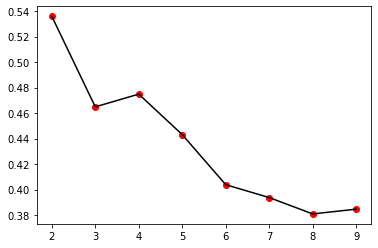

In [13]:
plt.plot(nc, sc_score, color = 'black')
plt.scatter(nc, sc_score, color = 'red')
plt.show()

#### Calinski_harabaz Score

In [14]:
from sklearn.metrics import calinski_harabasz_score as chs

In [15]:
nc = [2,3,4,5,6,7,8,9]
ch_score = []
for i in nc:
    km = KMeans(i)
    y = km.fit_predict(Air_norm.iloc[:,:11])
    ch_score.append(chs(Air_norm.iloc[:,:11], y))

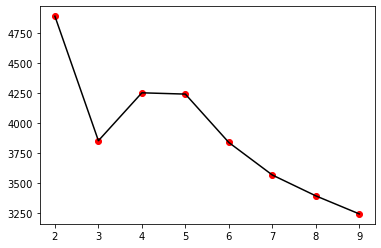

In [16]:
plt.plot(nc, ch_score, color = 'black')
plt.scatter(nc, ch_score, color = 'red')
plt.show()

### Hierarchial Clustering

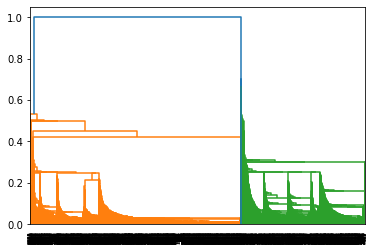

In [17]:
Dendrogram = sch.dendrogram(sch.linkage(Air_norm, method ='single'))

In [18]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')
hc.fit_predict(Air_norm)

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [19]:
Air_hc = Airlines.copy()
y_hc = hc.fit_predict(Air_norm) 

In [20]:
Air_hc['H-clustered'] = y_hc
Air_hc

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H-clustered
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


### K Means

In [21]:
modelA_kmeans = KMeans(n_clusters = 2)
modelA_kmeans.fit(Air_norm)

KMeans(n_clusters=2)

In [22]:
modelA_kmeans.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [23]:
modelA_kmeans.inertia_

823.6756984125205

In [24]:
md = pd.Series(modelA_kmeans.labels_)
Air_Kmeans = Airlines.copy()
Air_Kmeans['Labels'] = md

In [25]:
Air_Kmeans

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [26]:
Air_Kmeans.groupby(['Labels'])['ID#'].apply(lambda x :tuple(x))

Labels
0    (1, 2, 3, 4, 6, 7, 11, 13, 14, 15, 23, 24, 25,...
1    (5, 8, 9, 10, 12, 16, 17, 18, 19, 20, 21, 22, ...
Name: ID#, dtype: object

### DBSCAN

In [27]:
from sklearn.cluster import DBSCAN

In [28]:
dbs = DBSCAN(min_samples = 2, eps =1)
claas = dbs.fit_predict(Air_norm.iloc[:,:11])

In [29]:
Air_dbs = Airlines.copy()
Air_dbs['DBS'] = claas
Air_dbs

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,DBS
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


### KMedoids

In [37]:
from sklearn_extra.cluster import KMedoids

In [38]:
modelA_kmedoids = KMedoids(n_clusters = 2)
modelA_kmedoids.fit(Air_norm)

KMedoids(n_clusters=2)

In [39]:
modelA_kmedoids.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [40]:
modelA_kmeans.inertia_

823.6756984125205

In [41]:
md = pd.Series(modelA_kmedoids.labels_)
Air_Kmedoids = Airlines.copy()
Air_Kmedoids['Labels'] = md

In [42]:
Air_Kmedoids

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [43]:
Air_Kmedoids.groupby(['Labels'])['ID#'].apply(lambda x :tuple(x))

Labels
0    (1, 2, 3, 4, 6, 7, 11, 13, 14, 15, 23, 24, 25,...
1    (5, 8, 9, 10, 12, 16, 17, 18, 19, 20, 21, 22, ...
Name: ID#, dtype: object

## Crime Data

In [29]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is ACC0-1167

 Directory of C:\Users\shand\Documents\Siddy\ExcelR\Assignment\Clustering

13-01-2022  02:58    <DIR>          .
10-01-2022  23:09    <DIR>          ..
13-01-2022  02:33    <DIR>          .ipynb_checkpoints
13-01-2022  02:58           185,326 Clustering.ipynb
10-01-2022  23:09             1,328 crime_data.csv
10-01-2022  23:09           268,963 EastWestAirlines.xlsx
10-01-2022  23:09             1,560 Problem_Statement(Airlines).txt
10-01-2022  23:09               389 ProblemSatement(crime_data).txt
               5 File(s)        457,566 bytes
               3 Dir(s)  206,879,088,640 bytes free


In [30]:
Crime = pd.read_csv('crime_data.csv')

In [31]:
Crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [32]:
Crime.shape

(50, 5)

In [33]:
Crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [34]:
#Normalization
def normal(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [35]:
Crime_norm = normalize(Crime.iloc[:,1:])
Crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


### Optimum Number of Clusters

#### Inertia

In [36]:
nc = [1,2,3,4,5,6,7,8,9]
iner = []
for i in nc:
    km = KMeans(i)
    y = km.fit(Crime_norm.iloc[:,:11])
    iner.append(km.inertia_)


C:\Users\shand\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


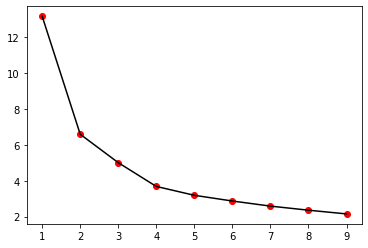

In [37]:
plt.plot(nc, iner, color = 'black')
plt.scatter(nc, iner, color = 'red')
plt.show()

#### Silhouette Score

In [38]:
nc = [2,3,4,5,6,7,8,9]
sc_score = []
for i in nc:
    km = KMeans(i)
    y = km.fit_predict(Crime_norm.iloc[:,:11])
    sc_score.append(sil(Crime_norm.iloc[:,:11], y))


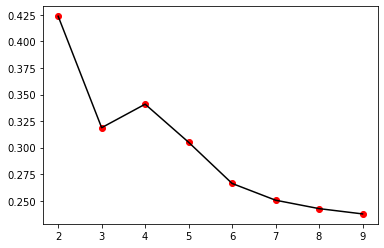

In [39]:
plt.plot(nc, sc_score, color = 'black')
plt.scatter(nc, sc_score, color = 'red')
plt.show()

#### Calinski_Harabasz Score

In [40]:
nc = [2,3,4,5,6,7,8,9]
ch_score = []
for i in nc:
    km = KMeans(i)
    y = km.fit_predict(Air_norm.iloc[:,:11])
    ch_score.append(chs(Air_norm.iloc[:,:11], y))

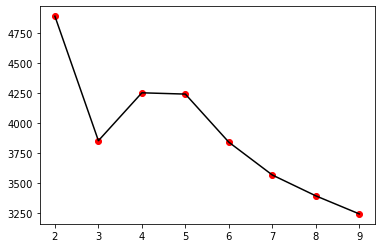

In [41]:
plt.plot(nc, ch_score, color = 'black')
plt.scatter(nc, ch_score, color = 'red')
plt.show()

### Hierarchial Cluster

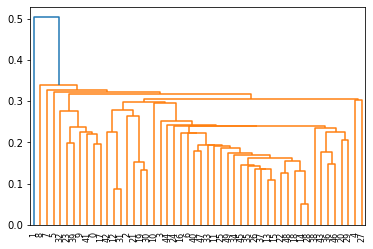

In [42]:
Dendrogram = sch.dendrogram(sch.linkage(Crime_norm, method ='single'))

In [43]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')
hc.fit_predict(Crime_norm)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
Crime_hc = Crime.copy()
y_hc = hc.fit_predict(Crime_norm) 

In [45]:
Crime_hc['H Cluster'] = y_hc
Crime_hc

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


### K Means

In [53]:
modelC_kmeans = KMeans(n_clusters = 2)
modelC_kmeans.fit(Crime_norm)

KMeans(n_clusters=2)

In [54]:
modelC_kmeans.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [55]:
modelC_kmeans.inertia_

6.596893867946197

In [57]:
Crime_kmeans = Crime.copy()
Crime_kmeans['Labels'] = pd.Series(modelC_kmeans.labels_)
Crime_kmeans

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Labels
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [63]:
Crime_kmeans.groupby(['Labels'])['Unnamed: 0'].apply(lambda x: tuple(x))

Labels
0    (Arkansas, Connecticut, Delaware, Hawaii, Idah...
1    (Alabama, Alaska, Arizona, California, Colorad...
Name: Unnamed: 0, dtype: object

### DBSCAN

In [66]:
dbs = DBSCAN(min_samples = 2, eps =0.2)
claas_pr = dbs.fit_predict(Crime_norm.iloc[:,:3])

In [67]:
Crime_dbs = Crime.copy()
Crime_dbs['DBS'] = claas_pr
Crime_dbs

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,DBS
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1
